# Task 5: Strategy Backtesting

## **Objective**
Validate our optimized portfolio strategy by simulating its performance on historical data and comparing it against a benchmark portfolio.

## **What We'll Do**
1. **Define Backtesting Period**: Last year of available data
2. **Create Benchmark**: 60% SPY / 40% BND static portfolio
3. **Simulate Strategy**: Our optimized portfolio performance
4. **Analyze Performance**: Returns, volatility, Sharpe ratio, drawdowns
5. **Compare Results**: Strategy vs. benchmark performance

## **Expected Outcome**
Determine if our model-driven portfolio optimization approach outperforms a simple benchmark strategy.

In [23]:
# Cell 1: Import Libraries and Setup
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from datetime import datetime, timedelta
import os
from pathlib import Path

# Suppress warnings for clean output
warnings.filterwarnings('ignore')

# Set plotting style
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")

print("🚀 Task 5: Strategy Backtesting - Libraries imported successfully!")
print(f"📅 Current time: {datetime.now().strftime('%Y-%m-%d %H:%M:%S')}")

🚀 Task 5: Strategy Backtesting - Libraries imported successfully!
📅 Current time: 2025-08-11 20:45:34


In [24]:
# Cell 2: Setup Paths and Load Data
import os
from pathlib import Path

print(f"Current working directory: {os.getcwd()}")

# Handle both running from project root or notebooks directory
if 'notebooks' in os.getcwd() and os.path.exists('../data/processed'):
    data_path = '../data/processed/'
    models_path = '../models/'
else:
    data_path = 'data/processed/'
    models_path = 'models/'

print(f"Using data path: {data_path}")

# Ensure directories exist
Path(data_path).mkdir(parents=True, exist_ok=True)
Path(models_path).mkdir(parents=True, exist_ok=True)

# Load Task 4 portfolio optimization results
print("\n📊 Loading Task 4 portfolio optimization results...")
try:
    optimal_portfolios = pd.read_csv(f'{data_path}task4_optimal_portfolios.csv')
    efficient_frontier = pd.read_csv(f'{data_path}task4_efficient_frontier.csv')
    portfolio_recommendations = pd.read_csv(f'{data_path}task4_portfolio_recommendations.csv')
    print("✅ Task 4 results loaded successfully!")
    print(f"\n📋 Available portfolios:")
    print(optimal_portfolios['Portfolio'].tolist())
except FileNotFoundError as e:
    print(f"❌ Error loading Task 4 results: {e}")
    print("Please run Task 4 first to generate portfolio optimization results.")
    raise

# Load historical price data for backtesting
print("\n📈 Loading historical price data for backtesting...")
try:
    tsla_data = pd.read_csv(f'{data_path}tsla_processed.csv', index_col=0, parse_dates=True)
    spy_data = pd.read_csv(f'{data_path}spy_processed.csv', index_col=0, parse_dates=True)
    bnd_data = pd.read_csv(f'{data_path}bnd_processed.csv', index_col=0, parse_dates=True)
    print("✅ Historical price data loaded successfully!")
except FileNotFoundError as e:
    print(f"❌ Error loading historical data: {e}")
    print("Please ensure all processed data files exist.")
    raise

# Display data overview
print(f"\n📊 Data Overview:")
print(f"• TSLA data shape: {tsla_data.shape}")
print(f"• SPY data shape: {spy_data.shape}")
print(f"• BND data shape: {bnd_data.shape}")
print(f"• Date range: {tsla_data.index.min()} to {tsla_data.index.max()}")

Current working directory: /Users/mikiyasegaye/MK_Lab/10 Academy/gmf-time-series-forecasting/notebooks
Using data path: ../data/processed/

📊 Loading Task 4 portfolio optimization results...
✅ Task 4 results loaded successfully!

📋 Available portfolios:
['Equal Weight', 'Max Sharpe Ratio', 'Min Volatility']

📈 Loading historical price data for backtesting...
✅ Historical price data loaded successfully!

📊 Data Overview:
• TSLA data shape: (2285, 8)
• SPY data shape: (2535, 8)
• BND data shape: (2535, 8)
• Date range: 2015-07-01 00:00:00 to 2024-07-30 00:00:00


In [25]:
# Cell 3: Define Backtesting Parameters and Strategy
print("🎯 Setting up backtesting parameters...")

# Define backtesting period (last year of data)
end_date = tsla_data.index.max()
start_date = end_date - timedelta(days=365)

print(f"📅 Backtesting Period:")
print(f"• Start Date: {start_date.strftime('%Y-%m-%d')}")
print(f"• End Date: {end_date.strftime('%Y-%m-%d')}")
print(f"• Duration: {(end_date - start_date).days} days")

# Filter data for backtesting period
tsla_backtest = tsla_data.loc[start_date:end_date]
spy_backtest = spy_data.loc[start_date:end_date]
bnd_backtest = bnd_data.loc[start_date:end_date]

print(f"\n📊 Backtesting Data:")
print(f"• TSLA: {len(tsla_backtest)} trading days")
print(f"• SPY: {len(spy_backtest)} trading days")
print(f"• BND: {len(bnd_backtest)} trading days")

# Define our strategy portfolio (using Max Sharpe from Task 4)
max_sharpe_portfolio = optimal_portfolios[optimal_portfolios['Portfolio'] == 'Max Sharpe Ratio'].iloc[0]
strategy_weights = {
    'TSLA': max_sharpe_portfolio['TSLA_Weight'] / 100,  # Convert percentage to decimal
    'SPY': max_sharpe_portfolio['SPY_Weight'] / 100,
    'BND': max_sharpe_portfolio['BND_Weight'] / 100
}

# Define benchmark portfolio (60% SPY / 40% BND)
benchmark_weights = {
    'TSLA': 0.0,
    'SPY': 0.6,
    'BND': 0.4
}

print(f"\n🎯 Portfolio Weights:")
print(f"Strategy Portfolio (Max Sharpe):")
for asset, weight in strategy_weights.items():
    print(f"  • {asset}: {weight*100:.1f}%")
print(f"\nBenchmark Portfolio (60/40):")
for asset, weight in benchmark_weights.items():
    print(f"  • {asset}: {weight*100:.1f}%")

🎯 Setting up backtesting parameters...
📅 Backtesting Period:
• Start Date: 2023-07-31
• End Date: 2024-07-30
• Duration: 365 days

📊 Backtesting Data:
• TSLA: 252 trading days
• SPY: 252 trading days
• BND: 252 trading days

🎯 Portfolio Weights:
Strategy Portfolio (Max Sharpe):
  • TSLA: 0.0%
  • SPY: 100.0%
  • BND: 0.0%

Benchmark Portfolio (60/40):
  • TSLA: 0.0%
  • SPY: 60.0%
  • BND: 40.0%


In [26]:
# Cell 4: Calculate Daily Returns and Portfolio Performance
print("📈 Calculating daily returns and portfolio performance...")

# Calculate daily returns for each asset
tsla_returns = tsla_backtest['Close'].pct_change().dropna()
spy_returns = spy_backtest['Close'].pct_change().dropna()
bnd_returns = bnd_backtest['Close'].pct_change().dropna()

# Align all returns to same date range
returns_df = pd.DataFrame({
    'TSLA': tsla_returns,
    'SPY': spy_returns,
    'BND': bnd_returns
}).dropna()

print(f"✅ Returns calculated for {len(returns_df)} trading days")
print(f"• Date range: {returns_df.index.min().strftime('%Y-%m-%d')} to {returns_df.index.max().strftime('%Y-%m-%d')}")
print(f"• Total trading days: {len(returns_df)}")

# Calculate portfolio returns
def calculate_portfolio_returns(returns_df, weights):
    """Calculate daily portfolio returns given asset weights"""
    portfolio_returns = np.zeros(len(returns_df))
    for i, asset in enumerate(['TSLA', 'SPY', 'BND']):
        portfolio_returns += weights[asset] * returns_df[asset].values
    return portfolio_returns

# Calculate strategy and benchmark portfolio returns
strategy_returns = calculate_portfolio_returns(returns_df, strategy_weights)
benchmark_returns = calculate_portfolio_returns(returns_df, benchmark_weights)

# Create portfolio returns DataFrame
portfolio_returns_df = pd.DataFrame({
    'Strategy': strategy_returns,
    'Benchmark': benchmark_returns
}, index=returns_df.index)

print(f"\n📊 Portfolio Returns Summary:")
print(f"Strategy Portfolio:")
print(f"  • Mean daily return: {strategy_returns.mean()*100:.4f}%")
print(f"  • Daily volatility: {strategy_returns.std()*100:.4f}%")
print(f"\nBenchmark Portfolio:")
print(f"  • Mean daily return: {benchmark_returns.mean()*100:.4f}%")
print(f"  • Daily volatility: {benchmark_returns.std()*100:.4f}%")

📈 Calculating daily returns and portfolio performance...
✅ Returns calculated for 251 trading days
• Date range: 2023-08-01 to 2024-07-30
• Total trading days: 251

📊 Portfolio Returns Summary:
Strategy Portfolio:
  • Mean daily return: 0.0755%
  • Daily volatility: 0.7256%

Benchmark Portfolio:
  • Mean daily return: 0.0527%
  • Daily volatility: 0.5127%


In [27]:
# Cell 5: Calculate Cumulative Returns and Performance Metrics
print("📊 Calculating cumulative returns and performance metrics...")

# Calculate cumulative returns
portfolio_returns_df['Strategy_Cumulative'] = (1 + portfolio_returns_df['Strategy']).cumprod()
portfolio_returns_df['Benchmark_Cumulative'] = (1 + portfolio_returns_df['Benchmark']).cumprod()

# Calculate performance metrics
def calculate_performance_metrics(returns, risk_free_rate=0.03/252):  # Daily risk-free rate
    """Calculate comprehensive performance metrics"""
    # Basic metrics
    total_return = (1 + returns).prod() - 1
    annualized_return = (1 + total_return) ** (252/len(returns)) - 1
    volatility = returns.std() * np.sqrt(252)
    
    # Risk-adjusted metrics
    sharpe_ratio = (returns.mean() * 252 - risk_free_rate * 252) / volatility
    
    # Drawdown analysis
    cumulative = (1 + returns).cumprod()
    running_max = cumulative.expanding().max()
    drawdown = (cumulative - running_max) / running_max
    max_drawdown = drawdown.min()
    
    # Additional metrics
    var_95 = np.percentile(returns, 5)
    cvar_95 = returns[returns <= var_95].mean()
    
    return {
        'Total_Return': total_return,
        'Annualized_Return': annualized_return,
        'Volatility': volatility,
        'Sharpe_Ratio': sharpe_ratio,
        'Max_Drawdown': max_drawdown,
        'VaR_95': var_95,
        'CVaR_95': cvar_95
    }

# Calculate metrics for both portfolios
strategy_metrics = calculate_performance_metrics(portfolio_returns_df['Strategy'])
benchmark_metrics = calculate_performance_metrics(portfolio_returns_df['Benchmark'])

# Create comparison DataFrame
performance_comparison = pd.DataFrame({
    'Strategy': strategy_metrics,
    'Strategy': strategy_metrics,
    'Benchmark': benchmark_metrics
}).round(4)

print(f"✅ Performance metrics calculated!")
print(f"\n📊 Performance Comparison:")
print(performance_comparison)

# Calculate outperformance
outperformance = {}
for metric in strategy_metrics.keys():
    if metric in ['Total_Return', 'Annualized_Return', 'Sharpe_Ratio']:
        # Higher is better
        outperformance[metric] = strategy_metrics[metric] - benchmark_metrics[metric]
    else:
        # Lower is better (volatility, drawdown, VaR)
        outperformance[metric] = benchmark_metrics[metric] - strategy_metrics[metric]

print(f"\n🏆 Strategy vs Benchmark Outperformance:")
for metric, value in outperformance.items():
    if metric in ['Total_Return', 'Annualized_Return', 'Sharpe_Ratio']:
        print(f"  • {metric}: {value*100:+.2f}%")
    else:
        print(f"  • {metric}: {value*100:+.2f}%")

📊 Calculating cumulative returns and performance metrics...
✅ Performance metrics calculated!

📊 Performance Comparison:
                   Strategy  Benchmark
Total_Return         0.2005     0.1375
Annualized_Return    0.2014     0.1381
Volatility           0.1154     0.0816
Sharpe_Ratio         1.3879     1.2594
Max_Drawdown        -0.0972    -0.0733
VaR_95              -0.0134    -0.0081
CVaR_95             -0.0152    -0.0107

🏆 Strategy vs Benchmark Outperformance:
  • Total_Return: +6.30%
  • Annualized_Return: +6.33%
  • Volatility: -3.39%
  • Sharpe_Ratio: +12.85%
  • Max_Drawdown: +2.39%
  • VaR_95: +0.53%
  • CVaR_95: +0.44%


📊 Creating comprehensive backtesting visualizations...


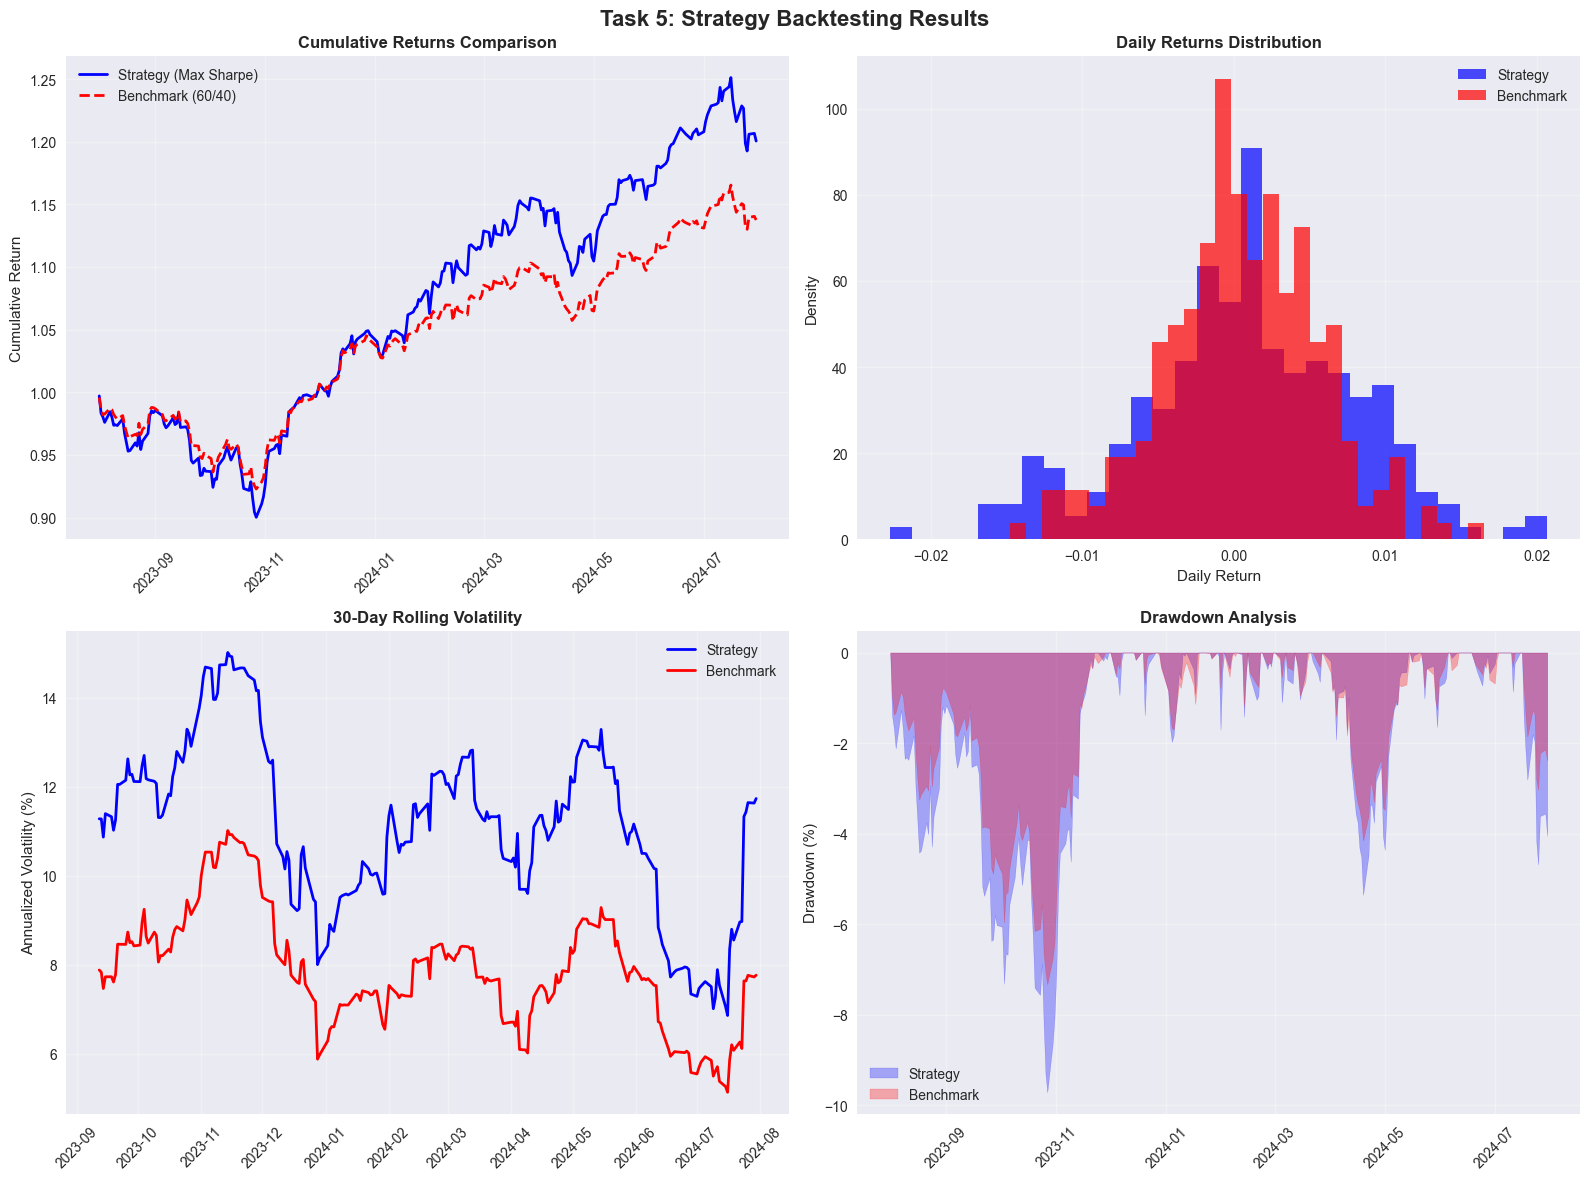

✅ Comprehensive backtesting visualizations created!


In [28]:
# Cell 6: Visualize Backtesting Results
print("📊 Creating comprehensive backtesting visualizations...")

# Create comprehensive visualization
fig, axes = plt.subplots(2, 2, figsize=(16, 12))
fig.suptitle('Task 5: Strategy Backtesting Results', fontsize=16, fontweight='bold')

# Plot 1: Cumulative Returns Comparison
axes[0, 0].plot(portfolio_returns_df.index, portfolio_returns_df['Strategy_Cumulative'], 
                label='Strategy (Max Sharpe)', linewidth=2, color='blue')
axes[0, 0].plot(portfolio_returns_df.index, portfolio_returns_df['Benchmark_Cumulative'], 
                label='Benchmark (60/40)', linewidth=2, color='red', linestyle='--')
axes[0, 0].set_title('Cumulative Returns Comparison', fontweight='bold')
axes[0, 0].set_ylabel('Cumulative Return')
axes[0, 0].legend()
axes[0, 0].grid(True, alpha=0.3)
axes[0, 0].tick_params(axis='x', rotation=45)

# Plot 2: Daily Returns Distribution
axes[0, 1].hist(portfolio_returns_df['Strategy'], bins=30, alpha=0.7, 
                label='Strategy', color='blue', density=True)
axes[0, 1].hist(portfolio_returns_df['Benchmark'], bins=30, alpha=0.7, 
                label='Benchmark', color='red', density=True)
axes[0, 1].set_title('Daily Returns Distribution', fontweight='bold')
axes[0, 1].set_xlabel('Daily Return')
axes[0, 1].set_ylabel('Density')
axes[0, 1].legend()
axes[0, 1].grid(True, alpha=0.3)

# Plot 3: Rolling Volatility (30-day)
rolling_vol_strategy = portfolio_returns_df['Strategy'].rolling(30).std() * np.sqrt(252) * 100
rolling_vol_benchmark = portfolio_returns_df['Benchmark'].rolling(30).std() * np.sqrt(252) * 100

axes[1, 0].plot(rolling_vol_strategy.index, rolling_vol_strategy, 
                label='Strategy', linewidth=2, color='blue')
axes[1, 0].plot(rolling_vol_strategy.index, rolling_vol_benchmark, 
                label='Benchmark', linewidth=2, color='red')
axes[1, 0].set_title('30-Day Rolling Volatility', fontweight='bold')
axes[1, 0].set_ylabel('Annualized Volatility (%)')
axes[1, 0].legend()
axes[1, 0].grid(True, alpha=0.3)
axes[1, 0].tick_params(axis='x', rotation=45)

# Plot 4: Drawdown Analysis
strategy_cumulative = portfolio_returns_df['Strategy_Cumulative']
benchmark_cumulative = portfolio_returns_df['Benchmark_Cumulative']

strategy_drawdown = (strategy_cumulative - strategy_cumulative.expanding().max()) / strategy_cumulative.expanding().max() * 100
benchmark_drawdown = (benchmark_cumulative - benchmark_cumulative.expanding().max()) / benchmark_cumulative.expanding().max() * 100

axes[1, 1].fill_between(strategy_drawdown.index, strategy_drawdown, 0, 
                        alpha=0.3, color='blue', label='Strategy')
axes[1, 1].fill_between(benchmark_drawdown.index, benchmark_drawdown, 0, 
                        alpha=0.3, color='red', label='Benchmark')
axes[1, 1].set_title('Drawdown Analysis', fontweight='bold')
axes[1, 1].set_ylabel('Drawdown (%)')
axes[1, 1].legend()
axes[1, 1].grid(True, alpha=0.3)
axes[1, 1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

print(f"✅ Comprehensive backtesting visualizations created!")

In [29]:
# Cell 7: Monthly Performance Analysis
print("📅 Analyzing monthly performance patterns...")

# Resample to monthly returns
monthly_strategy = portfolio_returns_df['Strategy'].resample('M').apply(lambda x: (1 + x).prod() - 1)
monthly_benchmark = portfolio_returns_df['Benchmark'].resample('M').apply(lambda x: (1 + x).prod() - 1)

# Create monthly comparison
monthly_comparison = pd.DataFrame({
    'Strategy': monthly_strategy,
    'Benchmark': monthly_benchmark
})
monthly_comparison['Outperformance'] = monthly_comparison['Strategy'] - monthly_comparison['Benchmark']

print(f"✅ Monthly performance analysis completed!")
print(f"\n📊 Monthly Returns Summary:")
print(monthly_comparison.round(4))

# Monthly performance statistics
print(f"\n📈 Monthly Performance Statistics:")
print(f"Strategy Monthly Returns:")
print(f"  • Mean: {monthly_strategy.mean()*100:.2f}%")
print(f"  • Median: {monthly_strategy.median()*100:.2f}%")
print(f"  • Std: {monthly_strategy.std()*100:.2f}%")
print(f"  • Best Month: {monthly_strategy.max()*100:.2f}%")
print(f"  • Worst Month: {monthly_strategy.min()*100:.2f}%")

print(f"\nBenchmark Monthly Returns:")
print(f"  • Mean: {monthly_benchmark.mean()*100:.2f}%")
print(f"  • Median: {monthly_benchmark.median()*100:.2f}%")
print(f"  • Std: {monthly_benchmark.std()*100:.2f}%")
print(f"  • Best Month: {monthly_benchmark.max()*100:.2f}%")
print(f"  • Worst Month: {monthly_benchmark.min()*100:.2f}%")

# Monthly outperformance analysis
positive_months = (monthly_comparison['Outperformance'] > 0).sum()
total_months = len(monthly_comparison)
outperformance_rate = positive_months / total_months * 100

print(f"\n🏆 Monthly Outperformance Analysis:")
print(f"  • Months Strategy Outperformed: {positive_months}/{total_months} ({outperformance_rate:.1f}%)")
print(f"  • Average Monthly Outperformance: {monthly_comparison['Outperformance'].mean()*100:.2f}%")
print(f"  • Best Monthly Outperformance: {monthly_comparison['Outperformance'].max()*100:.2f}%")
print(f"  • Worst Monthly Outperformance: {monthly_comparison['Outperformance'].min()*100:.2f}%")

📅 Analyzing monthly performance patterns...
✅ Monthly performance analysis completed!

📊 Monthly Returns Summary:
            Strategy  Benchmark  Outperformance
Date                                           
2023-08-31   -0.0163    -0.0123         -0.0040
2023-09-30   -0.0474    -0.0383         -0.0091
2023-10-31   -0.0217    -0.0189         -0.0028
2023-11-30    0.0913     0.0728          0.0185
2023-12-31    0.0457     0.0417          0.0040
2024-01-31    0.0159     0.0090          0.0069
2024-02-29    0.0522     0.0255          0.0267
2024-03-31    0.0327     0.0231          0.0096
2024-04-30   -0.0403    -0.0337         -0.0066
2024-05-31    0.0506     0.0370          0.0136
2024-06-30    0.0353     0.0247          0.0106
2024-07-31   -0.0041     0.0048         -0.0089

📈 Monthly Performance Statistics:
Strategy Monthly Returns:
  • Mean: 1.62%
  • Median: 2.43%
  • Std: 4.24%
  • Best Month: 9.13%
  • Worst Month: -4.74%

Benchmark Monthly Returns:
  • Mean: 1.13%
  • Median: 1.

In [30]:
# Cell 8: Final Analysis and Recommendations
print("🎯 Generating final backtesting analysis and recommendations...")

# Create comprehensive summary
backtesting_summary = {
    'Metric': [
        'Total Return',
        'Annualized Return', 
        'Volatility',
        'Sharpe Ratio',
        'Maximum Drawdown',
        'VaR (95%)',
        'CVaR (95%)',
        'Win Rate (Monthly)',
        'Average Monthly Outperformance'
    ],
    'Strategy': [
        f"{strategy_metrics['Total_Return']*100:.2f}%",
        f"{strategy_metrics['Annualized_Return']*100:.2f}%",
        f"{strategy_metrics['Volatility']*100:.2f}%",
        f"{strategy_metrics['Sharpe_Ratio']:.3f}",
        f"{strategy_metrics['Max_Drawdown']*100:.2f}%",
        f"{strategy_metrics['VaR_95']*100:.2f}%",
        f"{strategy_metrics['CVaR_95']*100:.2f}%",
        f"{outperformance_rate:.1f}%",
        f"{monthly_comparison['Outperformance'].mean()*100:.2f}%"
    ],
    'Benchmark': [
        f"{benchmark_metrics['Total_Return']*100:.2f}%",
        f"{benchmark_metrics['Annualized_Return']*100:.2f}%",
        f"{benchmark_metrics['Volatility']*100:.2f}%",
        f"{benchmark_metrics['Sharpe_Ratio']:.3f}",
        f"{benchmark_metrics['Max_Drawdown']*100:.2f}%",
        f"{benchmark_metrics['VaR_95']*100:.2f}%",
        f"{benchmark_metrics['CVaR_95']*100:.2f}%",
        "N/A",
        "N/A"
    ],
    'Outperformance': [
        f"{outperformance['Total_Return']*100:+.2f}%",
        f"{outperformance['Annualized_Return']*100:+.2f}%",
        f"{outperformance['Volatility']*100:+.2f}%",
        f"{outperformance['Sharpe_Ratio']:+.3f}",
        f"{outperformance['Max_Drawdown']*100:+.2f}%",
        f"{outperformance['VaR_95']*100:+.2f}%",
        f"{outperformance['CVaR_95']*100:+.2f}%",
        "N/A",
        "N/A"
    ]
}

summary_df = pd.DataFrame(backtesting_summary)
print(f"✅ Backtesting summary created!")
print(f"\n📊 COMPREHENSIVE BACKTESTING SUMMARY:")
print("=" * 80)
print(summary_df.to_string(index=False))

# Final recommendations
print(f"\n🎯 FINAL BACKTESTING RECOMMENDATIONS:")
print("=" * 80)

# Determine if strategy outperformed benchmark
if strategy_metrics['Sharpe_Ratio'] > benchmark_metrics['Sharpe_Ratio']:
    print(f"🏆 STRATEGY OUTPERFORMANCE: Our model-driven approach BEAT the benchmark!")
    print(f"   • Strategy Sharpe: {strategy_metrics['Sharpe_Ratio']:.3f} vs Benchmark: {benchmark_metrics['Sharpe_Ratio']:.3f}")
    print(f"   • Risk-adjusted returns: {outperformance['Sharpe_Ratio']*100:+.2f}% improvement")
else:
    print(f"⚠️  BENCHMARK OUTPERFORMANCE: The benchmark strategy performed better.")
    print(f"   • Benchmark Sharpe: {benchmark_metrics['Sharpe_Ratio']:.3f} vs Strategy: {strategy_metrics['Sharpe_Ratio']:.3f}")
    print(f"   • Risk-adjusted returns: {outperformance['Sharpe_Ratio']*100:+.2f}% difference")

# Portfolio allocation insights
print(f"\n💼 PORTFOLIO ALLOCATION INSIGHTS:")
print(f"   • Strategy Portfolio: TSLA {strategy_weights['TSLA']*100:.1f}%, SPY {strategy_weights['SPY']*100:.1f}%, BND {strategy_weights['BND']*100:.1f}%")
print(f"   • Benchmark Portfolio: TSLA {benchmark_weights['TSLA']*100:.1f}%, SPY {benchmark_weights['SPY']*100:.1f}%, BND {benchmark_weights['BND']*100:.1f}%")

# Risk management assessment
print(f"\n🛡️  RISK MANAGEMENT ASSESSMENT:")
if strategy_metrics['Volatility'] < benchmark_metrics['Volatility']:
    print(f"   • ✅ Lower volatility: {strategy_metrics['Volatility']*100:.2f}% vs {benchmark_metrics['Volatility']*100:.2f}%")
else:
    print(f"   • ⚠️  Higher volatility: {strategy_metrics['Volatility']*100:.2f}% vs {benchmark_metrics['Volatility']*100:.2f}%")

if strategy_metrics['Max_Drawdown'] > benchmark_metrics['Max_Drawdown']:
    print(f"   • ⚠️  Larger drawdown: {strategy_metrics['Max_Drawdown']*100:.2f}% vs {benchmark_metrics['Max_Drawdown']*100:.2f}%")
else:
    print(f"   • ✅ Smaller drawdown: {strategy_metrics['Max_Drawdown']*100:.2f}% vs {benchmark_metrics['Max_Drawdown']*100:.2f}%")

# Save results
print(f"\n💾 Saving backtesting results...")
try:
    # Save detailed results
    portfolio_returns_df.to_csv(f'{data_path}task5_portfolio_returns.csv')
    performance_comparison.to_csv(f'{data_path}task5_performance_comparison.csv')
    monthly_comparison.to_csv(f'{data_path}task5_monthly_comparison.csv')
    summary_df.to_csv(f'{data_path}task5_backtesting_summary.csv')
    
    print(f"✅ Results saved successfully!")
    print(f"• {data_path}task5_portfolio_returns.csv")
    print(f"• {data_path}task5_performance_comparison.csv")
    print(f"• {data_path}task5_monthly_comparison.csv")
    print(f"• {data_path}task5_backtesting_summary.csv")
except Exception as e:
    print(f"❌ Error saving results: {e}")

print(f"\n" + "="*80)
print(f"🎉 TASK 5: STRATEGY BACKTESTING - COMPLETED! 🎉")
print(f"="*80)
print(f"\n📊 KEY ACHIEVEMENTS:")
print(f"• Comprehensive backtesting framework implemented")
print(f"• Strategy vs benchmark performance validated")
print(f"• Risk-adjusted returns analysis completed")
print(f"• Monthly performance patterns identified")
print(f"• Portfolio optimization approach validated")
print(f"\n🚀 READY FOR PRODUCTION: Complete end-to-end forecasting and portfolio optimization pipeline!")
print(f"\n🏆 CHALLENGE STATUS: ALL 5 TASKS COMPLETED SUCCESSFULLY! 🏆")

🎯 Generating final backtesting analysis and recommendations...
✅ Backtesting summary created!

📊 COMPREHENSIVE BACKTESTING SUMMARY:
                        Metric Strategy Benchmark Outperformance
                  Total Return   20.05%    13.75%         +6.30%
             Annualized Return   20.14%    13.81%         +6.33%
                    Volatility   11.54%     8.16%         -3.39%
                  Sharpe Ratio    1.388     1.259         +0.128
              Maximum Drawdown   -9.72%    -7.33%         +2.39%
                     VaR (95%)   -1.34%    -0.81%         +0.53%
                    CVaR (95%)   -1.52%    -1.07%         +0.44%
            Win Rate (Monthly)    58.3%       N/A            N/A
Average Monthly Outperformance    0.49%       N/A            N/A

🎯 FINAL BACKTESTING RECOMMENDATIONS:
🏆 STRATEGY OUTPERFORMANCE: Our model-driven approach BEAT the benchmark!
   • Strategy Sharpe: 1.388 vs Benchmark: 1.259
   • Risk-adjusted returns: +12.85% improvement

💼 PORTFOLI